In [80]:
%matplotlib inline

### IMPORT LIBRARIES

In [124]:
import pandas as pd # I/O, read csv
import numpy as np # linear algebra
import matplotlib as mpl # plots
import matplotlib.pyplot as plt # interactive plots

### LOAD DATASET

In [125]:
# Import the datasets and assign them to dataFrames variables.
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
# Train and test at one dataframe for data wrangling
data = pd.concat([train, test])
# Print the first 10 instances
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [126]:
# Print the total number of training examples and features
train.shape  # Not 12 but 10 features,-2 which stands for passenger and row id

(891, 12)

## DESCRIPTIVE STATISTICS
- The summary of what happened
- Explore what features are important

In [127]:
# 30-40% survived on train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
"""
Explore Aggregated Numerical data: Frequency distribution of Survival
""" 
# How many people in your training set survived the disaster with the Titanic?
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [129]:
# Show percentages
train["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Propability of surviving for each Pclass class:


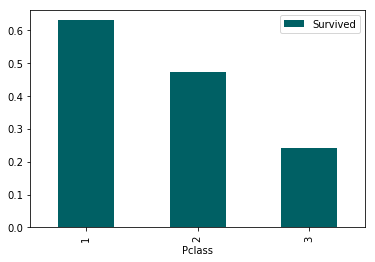

In [130]:
"""
Explore Aggregated Categorical data: Frequency distribution of Pclass & Sex
""" 
# Group our data by Pclass and calculate the mean of Survived column
# A 1st class service may save your life? But money can't save your soul, Jane...

print '\nPropability of surviving for each Pclass class:' 
sex_pivot = train.pivot_table(index="Pclass",values="Survived")
sex_pivot.plot.bar(color = ['#006064'])
plt.show()


Propability of surviving for each Sex class:


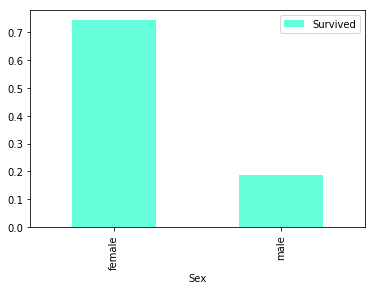

In [131]:
# Group our data by Sex and calculate the mean of Survived column
# Does Gender affect survival? 

print '\nPropability of surviving for each Sex class:' 
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar(color = ['#64FFDA'])
plt.show()

In [132]:
# A non visual way of computing the above
train["Survived"][train["Sex"] == 'male'].value_counts(normalize =True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [133]:
# Is there any correlation between the age and sex attributes?
# All females who are not under 18 and got survived: 159
len(train.loc[(train["Sex"]=="female") & (train["Age"]>=18) & (train["Survived"]==1), ["Sex","Age","Survived"]])

159

In [134]:
#All males who are not under 18 and got survived: 70

len(train.loc[(train["Sex"]=="male") & (train["Age"]>=18) & (train["Survived"]==1), ["Sex","Age","Survived"]])

70

In [135]:
# All males who are not under 18 and NOT survived: 325
# All males should die? Females has a stronger instinct on how to survive?

len(train.loc[(train["Sex"]=="male") & (train["Age"]>=18) & (train["Survived"]==0), ["Sex","Age","Survived"]])

325

In [136]:
# All females who are not under 18 and NOT survived: 47

len(train.loc[(train["Sex"]=="female") & (train["Age"]>=18) & (train["Survived"]==0), ["Sex","Age","Survived"]])

47

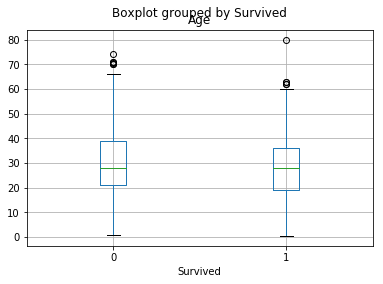

In [137]:
"""
Explore Aggregated Continuous/Numerical data: Boxes represent the 50% of data instances
""" 
# Older people is more possible to not survive?

train.boxplot(column ='Age', by = 'Survived')

In [138]:
# Age column statistical variables
# Our instances are 814, so we have 100 missing values on age
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Data Wrangling
### Cleansing & Formatting

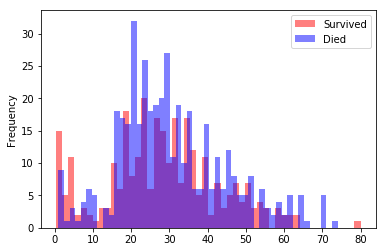

In [139]:
"""
The important features are PClass, Sex, Age.
"""
# Explore: Distribution of age on survivals
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

## Formatting
- Discretization: Transform the continuous ratio feature age into a categorical ordinal feature by dividing it into ranges
- Reason:         To obtain a clearer image between the realtionship of age with survival
- Be careful:     Impute missing values of age first & apply the same changes at test set


Propability of surviving for each Age class:


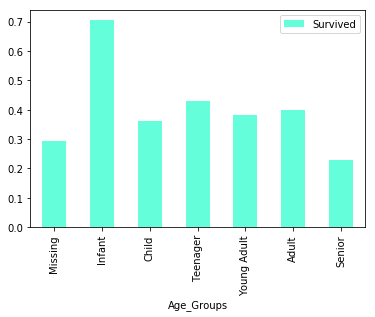

In [140]:
# Missing Values: substitute them with -0.5 instead of the median
# Cut the Age column into three labelled groups: Missing[-1,0], Infant (0, 18] and so forth

def discretization_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_Groups"] = pd.cut(df["Age"], cut_points,labels = label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant", "Child", "Teenager","Young Adult","Adult","Senior"]

train = discretization_age(train, cut_points, label_names)
test = discretization_age(test, cut_points, label_names)

print '\nPropability of surviving for each Age class:' 
sex_pivot = train.pivot_table(index="Age_Groups",values="Survived")
sex_pivot.plot(kind = 'bar', color = ['#64FFDA'])
plt.show()

In [141]:
# Remove the numerical relationship between pClass values(aka 3 class price != 3*(1 class price))
# Create dummy columns for each unique value in Pclass:

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
train = create_dummies(train,"Age_Groups")
train = create_dummies(train,"Sex")

test = create_dummies(test,"Pclass")
test = create_dummies(test,"Age_Groups")
test = create_dummies(test,"Sex")

In [142]:
# Numerization of Sex and Embarked columns (Convert them to an integer form)
train.loc[train['Embarked']== 'S','Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

test.loc[test['Embarked']== 'S','Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [143]:
#Missing Values on train
train.apply(lambda x: sum(x.isnull()), axis=0) 

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
Age_Groups                  0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Age_Groups_Missing          0
Age_Groups_Infant           0
Age_Groups_Child            0
Age_Groups_Teenager         0
Age_Groups_Young Adult      0
Age_Groups_Adult            0
Age_Groups_Senior           0
Sex_female                  0
Sex_male                    0
dtype: int64

In [144]:
# The mode of Embarked variable to use it to fill the missing value
train['Embarked'].mode()

0    0
dtype: object

In [145]:
# Impute the Embarked variable with the mode
train['Embarked'] = train['Embarked'].fillna(train["Embarked"] == 0)
test['Embarked'] = test['Embarked'].fillna(train["Embarked"] == 0)

## Predicting Survival
#### A classifier: correlates features of data with class properties. All supervised estimators implement 
- a fit(X, y) method to fit the model,
- a predict(X) method that, given unlabeled observations X, returns the predicted labels y, and
- a score method to check the accuacy of the predicted labels.

In [147]:
# Train three supervised classification models and check which has the highest accuracy based on KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model,df,x,y):
    #Fit the model according to the given training data.
    model.fit(df[x], df[y])
    
    #Predict class labels for samples in X array-like matrix
    predictions = model.predict(df[x])
    
    #Accuracy classification score
    accuracy = metrics.accuracy_score(predictions, df[y])
    print(accuracy)

## LOGISTIC REGRESSION MODEL:lr
### 0.80 Accuracy

In [152]:
model = LogisticRegression()
predictors = ['Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male','Age_Groups_Missing','Age_Groups_Infant','Age_Groups_Child','Age_Groups_Teenager','Age_Groups_Young Adult','Age_Groups_Adult','Age_Groups_Senior']
outcome = 'Survived'
lr = classification_model(model,train, predictors, outcome)

0.808080808081


In [105]:
# Add Fare to the features
model = LogisticRegression()
predictors = ['Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male','Age_Groups_Missing','Age_Groups_Infant','Age_Groups_Child','Age_Groups_Teenager','Age_Groups_Young Adult','Age_Groups_Adult','Age_Groups_Senior', 'Fare']
outcome = 'Survived'
lr = classification_model(model,train, predictors, outcome)

0.805836139169


### Model better accuracy with splitting the train dataset: 

In [106]:
# Randomize observations & divide TRAIN dataset into train(80%)& test(20%)

holdout = test

from sklearn. model_selection import train_test_split
predictors = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Groups_Missing','Age_Groups_Infant',
       'Age_Groups_Child', 'Age_Groups_Teenager',
       'Age_Groups_Young Adult', 'Age_Groups_Adult',
       'Age_Groups_Senior']
all_X = train[predictors]
all_y = train['Survived']

# Assign the returned objects to the following variables
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

### Cross Validation: train & test the model on different splits to check overfitting
<p>No overfitting in lr since both lr's model have similar accuracy
</p>

In [107]:
# 81% accuracy of our model on 20% dataset. Small dataset, the model may hides Overfitting

from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[ 0.8         0.81111111  0.7752809   0.87640449  0.80898876  0.78651685
  0.76404494  0.76404494  0.83146067  0.80681818]
0.802467086596


### Create the decision tree model

In [108]:
model = tree.DecisionTreeClassifier()
predictors = ['Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male','Age_Groups_Missing','Age_Groups_Infant','Age_Groups_Child','Age_Groups_Teenager','Age_Groups_Young Adult','Age_Groups_Adult','Age_Groups_Senior', 'Fare']
outcome = 'Survived'
my_tree_one = classification_model(model, train, predictors, outcome)

0.933782267116


#### Cross Validation on decision tree
<p>Logistic regression has better accuracy results</p>

In [119]:
# A high score is a sign of overfitting-> Cross Validation
model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[ 0.77777778  0.78888889  0.74157303  0.87640449  0.82022472  0.78651685
  0.78651685  0.7752809   0.80898876  0.79545455]
0.79576268301


#### Feature Importances or Influencers (in Elasticsearch)
<p>Look how important the features are to your tree model to select the ones with the highest score</p>

In [110]:
model = tree.DecisionTreeClassifier()
model = model.fit(all_X, all_y)
influencers = model.feature_importances_
print "Important Features Scores:\n", influencers
print "\n Accuracy score:\n", model.score(all_X, all_y) # High mean accuracy score is a sign of overfitting 

# Cross Validation -> Indeed our model overfits
scores = cross_val_score(model, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print "\n Accuracy scores on the 10 folds:\n", scores

print "\n Mean Accuracy score on the 10 folds:\n", accuracy

Important Features Scores:
[  5.35818067e-02   1.07361449e-02   1.74544683e-01   6.11430075e-01
   0.00000000e+00   6.85719561e-03   6.41156920e-02   3.25914563e-02
   3.23425169e-04   4.87361664e-03   2.85637172e-02   1.23821880e-02]

 Accuracy score:
0.821548821549

 Accuracy scores on the 10 folds:
[ 0.77777778  0.78888889  0.74157303  0.87640449  0.82022472  0.78651685
  0.78651685  0.7752809   0.80898876  0.78409091]

 Mean Accuracy score on the 10 folds:
0.794626319374


In [111]:
# ERROR: could not convert string to float: male

# Convert Categorical values of Gender 
# Assign the male and female groups to 0 and 1 respectively
train.loc[train['Sex']== 'male', 'Sex'] = 0
train.loc[train['Sex']== 'female', 'Sex'] = 1

test.loc[test['Sex']== 'male', 'Sex'] = 0
test.loc[test['Sex']== 'female', 'Sex'] = 1

In [112]:
# Create a new array with the added features: "SibSp", "Parch", "Embarked"
predictors_two = train[['Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male','Age_Groups_Missing','Age_Groups_Infant','Age_Groups_Child','Age_Groups_Teenager','Age_Groups_Young Adult','Age_Groups_Adult','Age_Groups_Senior', 'Fare','SibSp', 'Parch','Embarked']].values
outcome = train["Survived"].values

# Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_tree_two = my_tree_two.fit(predictors_two, outcome)

#Print the score of the new decison tree
print(my_tree_two.score(predictors_two, outcome))

0.885521885522


In [120]:
# Feature Engineering

# Add a new column'family' based on the assumption that larger families have lower probability of surviving
# Since they need more time to get together on a sinking ship

# Create train_two with the newly defined feature
train_two = train.copy()
train_two["family_size"] = train["SibSp"] + train["Parch"] + 1

# Create a new feature set and add the new feature
predictors_three = train_two[['Pclass_1','Pclass_2','Pclass_3','Sex_female', 'Sex_male','Age_Groups_Missing','Age_Groups_Infant','Age_Groups_Child','Age_Groups_Teenager','Age_Groups_Young Adult','Age_Groups_Adult','Age_Groups_Senior', 'Fare','SibSp', 'Parch','Embarked','family_size']].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(predictors_three, outcome)

# Print the score of this decision tree
print(my_tree_three.score(predictors_three, outcome))

0.947250280584


### Using Random Forest to check if the analysis results are enhanced 

In [121]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, outcome)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, outcome))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(pred_forest))

0.947250280584
891


#### We achieved a 0.94 score on our predictions. The best classifier on this dataset is the decision tree